#### HW 3 - Group: Rose Ernst and Zach Steele

# Model

Using the Japan Meteorological Association Data, develop a model to predict Nitrate concentrations based off of density, depth, and salinity data using the MLPRegressor. 

In [1]:
import pandas as pd #Import pandas as pd
import numpy as np #Import numpy as np
import matplotlib.pyplot as plt #import matplotlib.pyplot as plt

from sklearn.neural_network import MLPRegressor #Import MLP Regressor
from matplotlib import pyplot #import pyplot
from shapely.geometry import Point 
import geopandas as gpd #import geopandas as gpd
from geopandas import GeoDataFrame #Import GeoDataframe for mapping purposes

In [4]:
data = pd.read_csv('../data/jma_nitrate.csv',sep=',') #JMA
data = data[data['nitrate']>0] #remove nitrate values below 0 that are placeholders for NAs

In [14]:
y = data.nitrate #set dependent variable to test/train
x = data[['density','depth','sal']] #set independent variables to test/train

from sklearn.model_selection import train_test_split # import test/train capabilities
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4) #test size set to 20% and selected random state 4

from sklearn.preprocessing import StandardScaler #import scaler
scaler = StandardScaler().fit(x_train) #set scaler
standardized_x = scaler.transform(x_train) #apply to x training dataset
standardized_x_test = scaler.transform(x_test) #apply to x testing dataset

In [15]:
n = 5 # set nodes equal to 5
d = 5 # set layers equal to 5
from sklearn.metrics import mean_squared_error, r2_score #import RMSE and r2
from sklearn.neural_network import MLPRegressor #import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(n,d),
                     activation='relu', max_iter=10000) #define model using n/d for nodes and layers

model.fit(standardized_x,y_train) #use traning data to set model

y_pred = model.predict(standardized_x_test) #use testing model to predict values

print('r2 =', r2_score(y_train, model.predict(standardized_x))) #print r2 value for training model
print('r2 =', r2_score(y_test, y_pred)) #print r2 value for testing model
print('RMSE =',np.sqrt(mean_squared_error(y_test, y_pred))) #print RMSE value for testing model

r2 = 0.9848763868191814
r2 = 0.9848727508367981
RMSE = 1.897722794735937


In [71]:
n = [1,2,3,4,5] #set possible node values
d = [1,2,3,4,5] #set possible layer values
scores = {}

for layer in d:
    for nodes in n:
        model = MLPRegressor(hidden_layer_sizes=(nodes,layer),
                     activation='relu', max_iter=10000)
        model.fit(standardized_x,y_train)
        y_pred = model.predict(standardized_x_test)
        scores[layer,nodes] = r2_score(y_test,y_pred)
scores #define and run loop for different possible combinations of nodes and layers
# print the r2 value and the node/layer combo for each

{(1, 1): 0.8924191379999349,
 (1, 2): 0.9616300602511555,
 (1, 3): 0.9299223057373266,
 (1, 4): 0.9238290451813147,
 (1, 5): 0.9761940132973497,
 (2, 1): 0.9184906449311612,
 (2, 2): 0.9638660269712288,
 (2, 3): 0.9624907882347914,
 (2, 4): 0.9641459550926423,
 (2, 5): 0.9231989577370543,
 (3, 1): 0.9233681379711995,
 (3, 2): 0.9624410971888794,
 (3, 3): 0.9623871603809514,
 (3, 4): 0.981863685432475,
 (3, 5): 0.9646614121839937,
 (4, 1): 0.9218985180296543,
 (4, 2): 0.9235459780840928,
 (4, 3): 0.9238899815244451,
 (4, 4): 0.9649953606411681,
 (4, 5): 0.9333478504118946,
 (5, 1): 0.9184710856888536,
 (5, 2): 0.9621010294740252,
 (5, 3): 0.9693122516840089,
 (5, 4): 0.9786248144960318,
 (5, 5): 0.9865339361141388}

While random_state sets what the training vs test data is, use of MLPRegressor changes R2 values slightly on each run. Across multiple runs, they remained in the same general range (although occasionally there would be an outlayer of 10^-5 in (1,1)

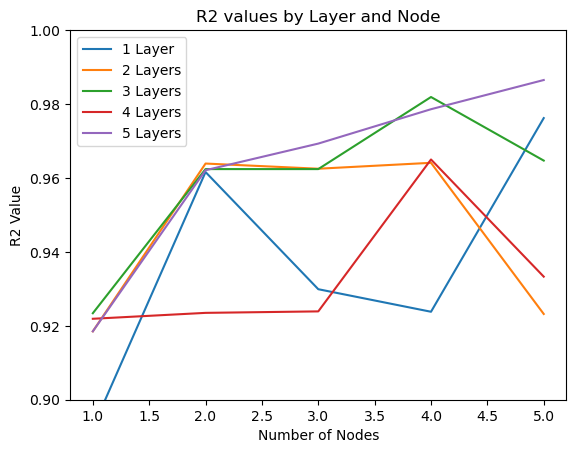

In [72]:
nodes = [1,2,3,4,5] #different nodes
# Load in r2 for each layer
layer1 = [0.8924,0.9616,0.9299,0.9238,0.9762]
layer2 = [0.9185,0.9639,0.9625,0.9641,0.9232]
layer3 = [0.9234,0.9624,0.9624,0.9819,0.9647]
layer4 = [0.9219,0.9235,0.9239,0.9650,0.9333]
layer5 = [0.9185,0.9621,0.9693,0.9786,0.9865]

#Plot the different r2 values for each node/layer combo
plt.plot(nodes, layer1, label = "1 Layer")
plt.plot(nodes, layer2, label = "2 Layers")
plt.plot(nodes, layer3, label = "3 Layers")
plt.plot(nodes, layer4, label = "4 Layers")
plt.plot(nodes, layer5, label = "5 Layers")
plt.ylim((0.9,1))
plt.xlabel("Number of Nodes")
plt.ylabel("R2 Value")
plt.title("R2 values by Layer and Node")
plt.legend()
plt.show()

Overall, r2 values increase by the number of layers, and in some cases number of nodes, but not consistently. Aside from the 10^-5 outliers, values are consistently >0.9.

The highest values were found in layers 4 and 5, and nodes 2, 4 and 5. 

The highest r2 value was for nodes=5, layers=5

# Exploratory Data Analysis
Importing necessary data sets. 

data is the Japan Meteorological Association dataset

data_2 is the BGC Argo dataset

In [7]:
data_2 = pd.read_csv('../data/kuro_BGCargo_NO3.csv',sep=',') #Argo

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15574 entries, 0 to 16220
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  15574 non-null  int64  
 1   theta       15574 non-null  float64
 2   sal         15574 non-null  float64
 3   depth       15574 non-null  int64  
 4   nitrate     15574 non-null  float64
 5   lon         15574 non-null  float64
 6   lat         15574 non-null  float64
 7   date        15574 non-null  object 
 8   year        15574 non-null  float64
 9   month       15574 non-null  float64
 10  day         15574 non-null  float64
 11  profile     15574 non-null  float64
 12  cruise      15574 non-null  object 
 13  vessel      15574 non-null  object 
 14  density     15574 non-null  float64
dtypes: float64(10), int64(2), object(3)
memory usage: 1.9+ MB


14 columns, all with the same number of non-null entries. The majority are float64s but date, cruise, and vessel are objects. Date is already split into year, month and day.

In [14]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14118 entries, 0 to 16135
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date/GMT             14118 non-null  object 
 1   Days since 1/1/1900  14118 non-null  float64
 2   NITRATE[uMOL/KG]     14118 non-null  float64
 3   DEPTH[M]             14118 non-null  float64
 4   PRESSURE[DBAR]       14118 non-null  float64
 5   NA                   14118 non-null  int64  
 6   SALINITY[PSS]        14118 non-null  float64
 7   TEMPERATURE[C]       14118 non-null  float64
 8   SIGMATHETA[KG/M3]    14118 non-null  float64
 9   OXYGEN[uMOL/KG]      14118 non-null  float64
 10  OXYGENSAT            14118 non-null  float64
 11  LON                  14118 non-null  float64
 12  LAT                  14118 non-null  float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB


Only object is Date/GMT, which is not pre-seperated into Year/Month/Day and includes time, although there is Days since 1/1/1900. 

Column names are different, include units in name. Additional variables are Pressure, Oxygen concentration, and Oxygen saturation.

In [15]:
data.isna().sum() # Searches for NAs in each column

Unnamed: 0    0
theta         0
sal           0
depth         0
nitrate       0
lon           0
lat           0
date          0
year          0
month         0
day           0
profile       0
cruise        0
vessel        0
density       0
dtype: int64

In [16]:
data_2.isna().sum() # Searches for NAs in each column

Date/GMT               0
Days since 1/1/1900    0
NITRATE[uMOL/KG]       0
DEPTH[M]               0
PRESSURE[DBAR]         0
NA                     0
SALINITY[PSS]          0
TEMPERATURE[C]         0
SIGMATHETA[KG/M3]      0
OXYGEN[uMOL/KG]        0
OXYGENSAT              0
LON                    0
LAT                    0
dtype: int64

No NAs present in either dataset.

In [17]:
(data == 0).sum() #searches for zeros in each column

Unnamed: 0      1
theta           0
sal             0
depth         404
nitrate         0
lon             0
lat             0
date            0
year            0
month           0
day             0
profile         0
cruise          0
vessel          0
density         0
dtype: int64

In [5]:
(data_2 == 0).sum() #searches for zeros in each column

Date/GMT               0
Days since 1/1/1900    0
NITRATE[uMOL/KG]       0
DEPTH[M]               0
PRESSURE[DBAR]         0
NA                     0
SALINITY[PSS]          0
TEMPERATURE[C]         0
SIGMATHETA[KG/M3]      0
OXYGEN[uMOL/KG]        0
OXYGENSAT              0
LON                    0
LAT                    0
dtype: int64

Only zero values present are for depth, representing surface, only in JMA data, as Argo is acting below the surface.

In [21]:
data_2.shape

(14118, 13)

In [22]:
data.size

233610

In [24]:
data_2.size

183534

The JMA Data is larger than the Argo Data.

## Descriptive statistics

In [25]:
data.describe()

,Unnamed: 0,theta,sal,depth,nitrate,lon,lat,year,month,day,profile,density
count,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000,15574.000000
mean,8175.135932,7.042844,34.433404,1418.388211,26.855277,151.599624,32.696928,2012.313664,6.851034,13.509375,268.636766,26.574613
std,4675.484666,7.113994,0.354281,1528.846644,15.480812,9.692016,8.979100,1.684952,2.660677,8.723439,148.651926,1.221275
min,0.000000,0.034400,32.349200,0.000000,0.010000,133.990833,0.332167,2010.000000,2.000000,1.000000,1.000000,20.951302
25%,4105.250000,1.589650,34.240600,203.000000,11.250000,145.727833,30.003333,2011.000000,5.000000,6.000000,139.000000,25.882225
50%,8228.500000,3.418650,34.550800,803.000000,35.350000,148.149667,34.239500,2012.000000,7.000000,12.000000,275.000000,27.094050
75%,12223.750000,12.294850,34.681800,2002.000000,39.797500,164.231000,39.660833,2013.000000,9.000000,20.000000,394.000000,27.527512
max,16220.000000,29.923300,35.548100,6161.000000,45.330000,170.035167,49.991500,2016.000000,12.000000,31.000000,529.000000,27.681606


In [26]:
data_2.describe()

,Days since 1/1/1900,NITRATE[uMOL/KG],DEPTH[M],PRESSURE[DBAR],NA,SALINITY[PSS],TEMPERATURE[C],SIGMATHETA[KG/M3],OXYGEN[uMOL/KG],OXYGENSAT,LON,LAT
count,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000,1.411800e+04,1.411800e+04,14118.000000,14118.00000
mean,42020.134744,13.167418,-308.132532,-310.725492,6.641167,34.444247,13.177575,25.800810,inf,inf,166.996243,33.43037
std,411.744603,13.164640,257.806675,260.216590,3.261655,0.266298,5.165774,0.827549,inf,inf,6.850736,1.98193
min,41335.568000,0.010000,-990.493000,-999.800000,1.000000,33.675300,3.018000,21.966000,2.280000e+01,7.100000e+00,148.325000,30.09200
25%,41658.354000,3.660000,-378.556500,-381.590000,4.000000,34.234225,9.525750,25.350000,1.864000e+02,7.000000e+01,162.973000,31.81300
50%,42018.476000,7.990000,-239.649500,-241.500000,7.000000,34.484300,14.511050,25.706000,2.095000e+02,8.410000e+01,169.174000,32.74100
75%,42382.406000,17.690000,-110.028500,-110.860000,9.000000,34.669550,16.709075,26.357000,2.247000e+02,9.300000e+01,171.626000,35.10400
max,42736.536000,50.460000,-5.450000,-5.490000,12.000000,35.350200,27.426200,27.410000,1.790000e+308,1.790000e+308,176.199000,37.75900


Depth values are deeper for  the JMA data than the Argo, which has a smaller range. Depth is negative in Argo and positive in JMA, which needs to be corrected for. 

Salinity and density both have similar means and ranges

Temperature is lower in JMA than Argo, but covers a similar range of values. 

In [8]:
data_2['DEPTH[M]'] = data_2['DEPTH[M]'].apply(lambda x: x*-1) #correct for depth

In [29]:
data_2.describe() # Confirm that this worked

,Days since 1/1/1900,NITRATE[uMOL/KG],DEPTH[M],PRESSURE[DBAR],NA,SALINITY[PSS],TEMPERATURE[C],SIGMATHETA[KG/M3],OXYGEN[uMOL/KG],OXYGENSAT,LON,LAT
count,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000,14118.000000,1.411800e+04,1.411800e+04,14118.000000,14118.00000
mean,42020.134744,13.167418,308.132532,-310.725492,6.641167,34.444247,13.177575,25.800810,inf,inf,166.996243,33.43037
std,411.744603,13.164640,257.806675,260.216590,3.261655,0.266298,5.165774,0.827549,inf,inf,6.850736,1.98193
min,41335.568000,0.010000,5.450000,-999.800000,1.000000,33.675300,3.018000,21.966000,2.280000e+01,7.100000e+00,148.325000,30.09200
25%,41658.354000,3.660000,110.028500,-381.590000,4.000000,34.234225,9.525750,25.350000,1.864000e+02,7.000000e+01,162.973000,31.81300
50%,42018.476000,7.990000,239.649500,-241.500000,7.000000,34.484300,14.511050,25.706000,2.095000e+02,8.410000e+01,169.174000,32.74100
75%,42382.406000,17.690000,378.556500,-110.860000,9.000000,34.669550,16.709075,26.357000,2.247000e+02,9.300000e+01,171.626000,35.10400
max,42736.536000,50.460000,990.493000,-5.490000,12.000000,35.350200,27.426200,27.410000,1.790000e+308,1.790000e+308,176.199000,37.75900


### Depth Comparison

In [35]:
data.loc[data['depth'].idxmax()] # Look at max depth for jma

Unnamed: 0               7620
theta                  1.0287
sal                   34.6943
depth                    6161
nitrate                 34.68
lon                    147.47
lat                 30.005333
date               2012/07/08
year                   2012.0
month                     7.0
day                       8.0
profile                 254.0
cruise                  12-05
vessel         R/V Ryofu Maru
density              27.66761
Name: 7620, dtype: object

Max depth for JMA is 6161

In [37]:
data_2.loc[data_2['DEPTH[M]'].idxmax()] # Look at max depth for Argo

Date/GMT               11/15/2016 15:28
Days since 1/1/1900           42689.644
NITRATE[uMOL/KG]                  44.24
DEPTH[M]                        990.493
PRESSURE[DBAR]                   -999.8
NA                                   11
SALINITY[PSS]                   34.2756
TEMPERATURE[C]                   3.6714
SIGMATHETA[KG/M3]                 27.25
OXYGEN[uMOL/KG]                    26.2
OXYGENSAT                           8.2
LON                             175.465
LAT                              31.469
Name: 15593, dtype: object

Max depth for Argo is 990.493 - signficantly smaller than JMA

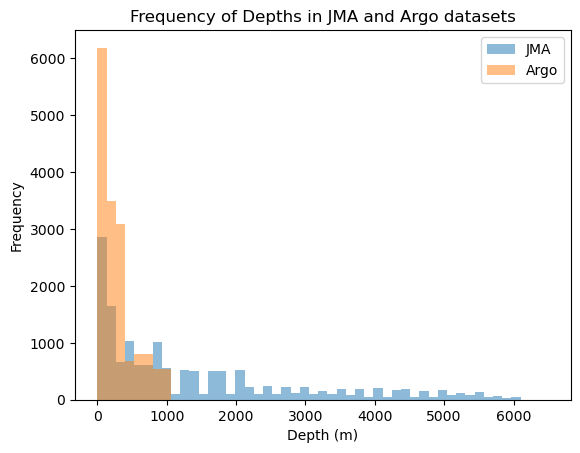

In [18]:
jma_Depth = [data['depth']] #create jma depth standalone
Argo_Depth =[data_2['DEPTH[M]']]  #create Argo depth standalone

bins = np.linspace(0, 6500) #Set size of plot based on max jma value

pyplot.hist(jma_Depth, bins, alpha=0.5, label='JMA') #load jma depth
pyplot.hist(Argo_Depth, bins, alpha=0.5, label='Argo') #load Argo depth
pyplot.legend(loc='upper right') #load legend
pyplot.xlabel('Depth (m)') #load x label
pyplot.ylabel('Frequency') #load y label
pyplot.title('Frequency of depths in JMA and Argo datasets')
pyplot.show() #show plot

JMA dataset has a larger range of depths, but overlaps with the Argo dataset, which is all <1000 meters.

## Geographic Range

Explore geographic range of jma dataset

Text(80.34722222222221, 0.5, 'Latitude')

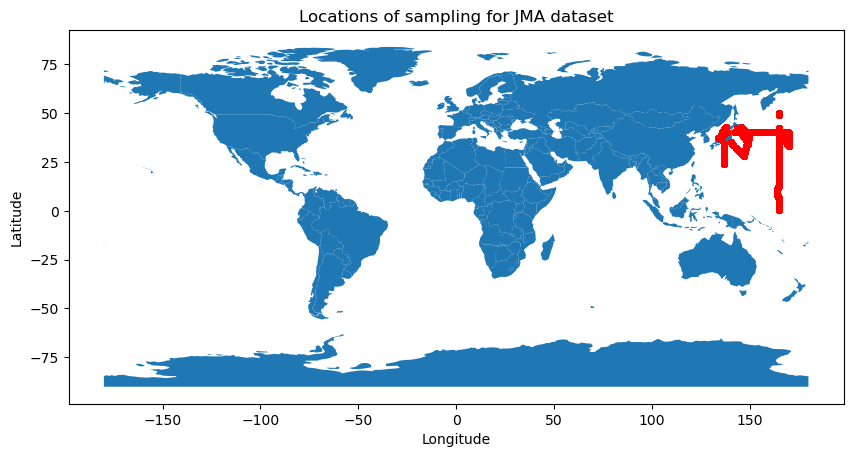

In [3]:
geometry = [Point(xy) for xy in zip(data['lon'], data['lat'])] #load in longitude and latitude data for jma
gdf = GeoDataFrame(data, geometry=geometry) #set geodataframe


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) #load in basic map
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15) #plot points on map
pyplot.title('Locations of sampling for JMA dataset') #load Title
pyplot.xlabel('Longitude') # #load x label
pyplot.ylabel('Latitude') #load y label

Text(80.34722222222221, 0.5, 'Latitude')

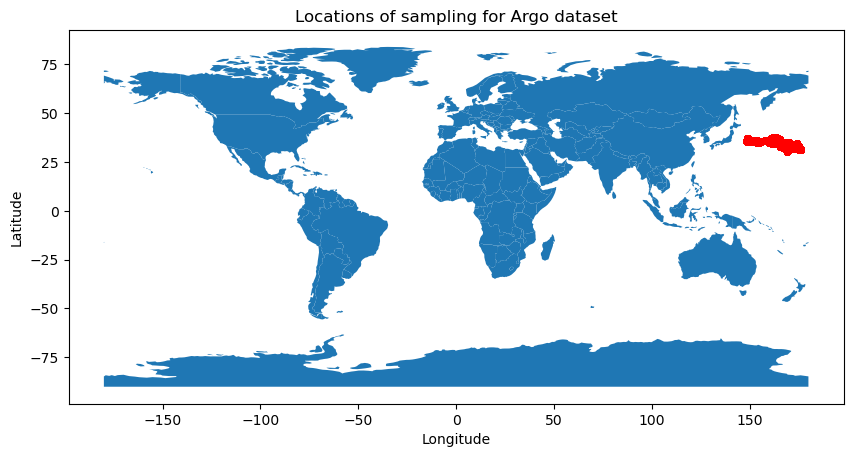

In [4]:
# Explore geographic range of Argo dataset

geometry = [Point(xy) for xy in zip(data_2['LON'], data_2['LAT'])] #load in longitude and latitude data for Argo
gdf = GeoDataFrame(data_2, geometry=geometry) #set geodataframe 

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')) #load in basic map
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15) #plot points on map
pyplot.title('Locations of sampling for Argo dataset') #load Title
pyplot.xlabel('Longitude') # #load x label
pyplot.ylabel('Latitude') #load y label

Both datasets are in the same general area, in the Pacific Ocean off the coast of Japan. JMA has a larger spatial range, but the two ranges overlap. 

## Water mass characteristics 
### Salinity

In [7]:
data.loc[data['sal'].idxmax()] #Look at max salinity for jma

Unnamed: 0                              4993
theta                                27.5948
sal                                  35.5481
depth                                    126
nitrate                                 5.35
lon                                  165.002
lat                                 0.332167
date                              2011/08/09
year                                  2011.0
month                                    8.0
day                                      9.0
profile                                163.0
cruise                                 11-08
vessel                        R/V Ryofu Maru
density                            22.811166
geometry      POINT (165.002 0.332166666667)
Name: 4993, dtype: object

In [9]:
data_2.loc[data_2['SALINITY[PSS]'].idxmax()] ## Look at max salinity for Argo

Date/GMT                     04/23/2015 11:32
Days since 1/1/1900                 42117.481
NITRATE[uMOL/KG]                         0.35
DEPTH[M]                              -16.445
PRESSURE[DBAR]                         -16.56
NA                                          4
SALINITY[PSS]                         35.3502
TEMPERATURE[C]                        21.2043
SIGMATHETA[KG/M3]                      24.707
OXYGEN[uMOL/KG]                         226.8
OXYGENSAT                               103.0
LON                                   168.878
LAT                                    31.032
geometry               POINT (168.878 31.032)
Name: 9056, dtype: object

Max salinty is slightly higher for the JMA than the Argo but are both similar.

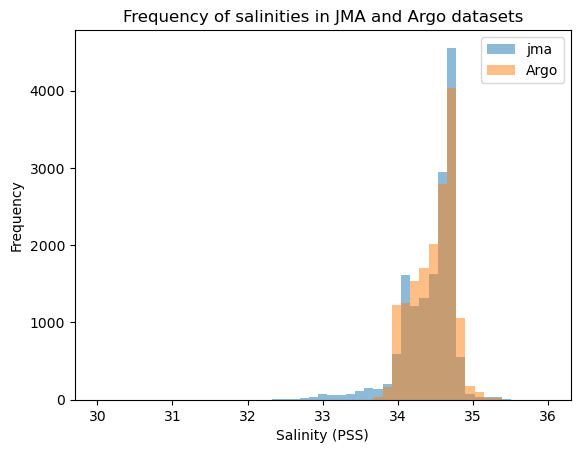

In [24]:
jma_salinity = [data['sal']] #create jma salinity standalone
Argo_salinity = [data_2['SALINITY[PSS]']] #create Argo salinity standalone

bins = np.linspace(30, 36) #Set size of plot based on max jma value

pyplot.hist(jma_salinity, bins, alpha=0.5, label='jma') #load jma salinity
pyplot.hist(Argo_salinity, bins, alpha=0.5, label='Argo') #load Argo salinity
pyplot.legend(loc='upper right') #load legend
pyplot.xlabel('Salinity (PSS)') #load x label
pyplot.ylabel('Frequency') #load y label
pyplot.title('Frequency of salinities in JMA and Argo datasets')
pyplot.show() #show plot

The JMA Dataset has a greater range, but encompasses the Argo dataset, and there is a very close overlap.

### Density

In [7]:
data.loc[data['density'].idxmax()] # Look at max density for jma

Unnamed: 0               3913
theta                  0.9072
sal                   34.7018
depth                    5297
nitrate                 33.82
lon                164.981667
lat                 13.487833
date               2011/07/23
year                   2011.0
month                     7.0
day                      23.0
profile                 133.0
cruise                  11-08
vessel         R/V Ryofu Maru
density             27.681606
Name: 3913, dtype: object

In [8]:
data_2.loc[data_2['SIGMATHETA[KG/M3]'].idxmax()] # Look at max density for Argo - remember density is sigmatheta

Date/GMT               03/28/2013 14:41
Days since 1/1/1900           41361.612
NITRATE[uMOL/KG]                  42.82
DEPTH[M]                        988.394
PRESSURE[DBAR]                  -998.03
NA                                    3
SALINITY[PSS]                   34.3993
TEMPERATURE[C]                    3.018
SIGMATHETA[KG/M3]                 27.41
OXYGEN[uMOL/KG]                    34.9
OXYGENSAT                          10.8
LON                             148.346
LAT                              35.628
Name: 300, dtype: object

The maximum density is slightly higher in the JMA dataset but very close

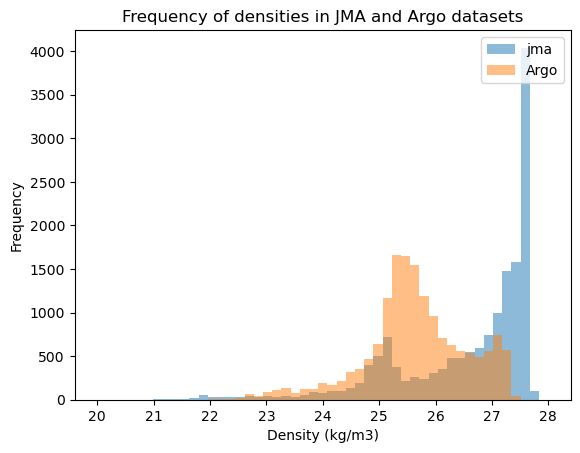

In [21]:
jma_density = [data['density']] #create jma density standalone
Argo_density = [data_2['SIGMATHETA[KG/M3]']] #create Argo density standalone
 
bins = np.linspace(20, 28) #Set size of plot based on max jma value

pyplot.hist(jma_density, bins, alpha=0.5, label='jma') #load jma denisty
pyplot.hist(Argo_density, bins, alpha=0.5, label='Argo') #load Argo density
pyplot.legend(loc='upper right') #load legend
pyplot.xlabel('Density (kg/m3)') #load x label
pyplot.ylabel('Frequency') #load y label
pyplot.title('Frequency of densities in JMA and Argo datasets')
pyplot.show() #show plot

JMA has higher densities and at greater frequency, but overlaps with the full range of Argo data.

### Temperature

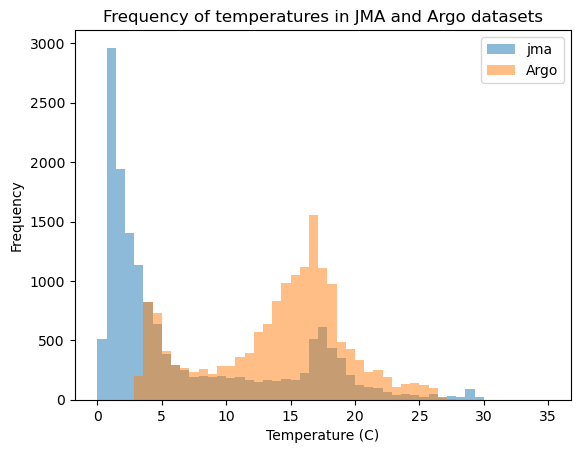

In [22]:
Argo_temp = [data_2['TEMPERATURE[C]']] #create Argo temp standalone
jma_temp = [data['theta']] #create jma temp standalone

bins = np.linspace(0, 35) #Set size of plot based on relevant temps

pyplot.hist(jma_temp, bins, alpha=0.5, label='jma') #load jma temps
pyplot.hist(Argo_temp, bins, alpha=0.5, label='Argo') #load Argo temps
pyplot.legend(loc='upper right') #load legend
pyplot.xlabel('Temperature (C)') #load x label
pyplot.ylabel('Frequency') #load y label
pyplot.title('Frequency of temperatures in JMA and Argo datasets')
pyplot.show() #show plot 

JMA has a wider range, and is more frequently at colder temperatures than the Argo dataset, but the two have a full overlap in range. 

## Seasonality

In [27]:
data_2['year'] = pd.DatetimeIndex(data_2['Date/GMT']).year #creates year column based on Date
data_2['month'] = pd.DatetimeIndex(data_2['Date/GMT']).month #creates month column based on Date

In [28]:
data_2['year'] #ensure this worked for year

0        2013
1        2013
2        2013
3        2013
4        2013
         ... 
16131    2016
16132    2016
16133    2017
16134    2017
16135    2017
Name: year, Length: 16136, dtype: int64

In [29]:
data_2['month'] #ensure this worked for month

0         3
1         3
2         3
3         3
4         3
         ..
16131    12
16132    12
16133     1
16134     1
16135     1
Name: month, Length: 16136, dtype: int64

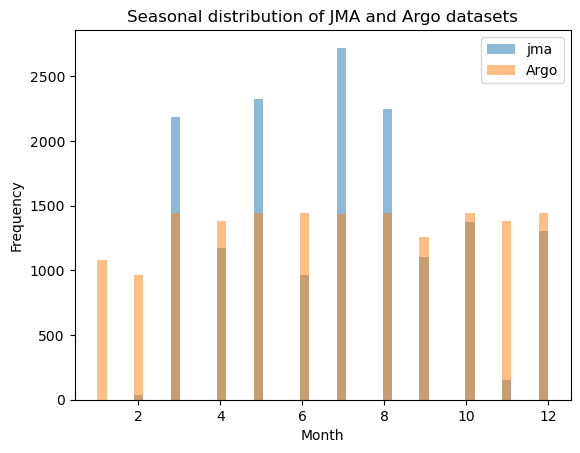

In [31]:
jma_month = [data['month']] #create jma month standalone
Argo_month = [data_2['month']] #create Argo month standalone

bins = np.linspace(1, 12) #Set size of plot based on number of months

pyplot.hist(jma_month, bins, alpha=0.5, label='jma') #load jma months
pyplot.hist(Argo_month, bins, alpha=0.5, label='Argo') #load Argo months
pyplot.legend(loc='upper right') #load legend
pyplot.xlabel('Month') #load x label
pyplot.ylabel('Frequency') #load y label
pyplot.title('Seasonal distribution of JMA and Argo datasets')
pyplot.show() #show plot

Seasonality there is a significant difference. Argo is constant throughout the year, but JMA favors spring/summer. Notably, there is no data from January and very little from February. 

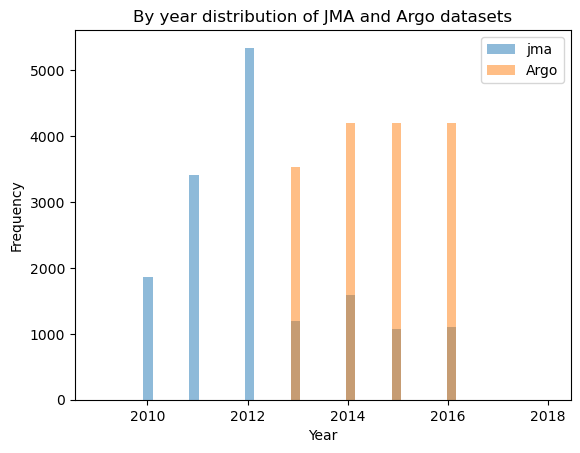

In [32]:
jma_year = [data['year']] #create jma year standalone
Argo_year = [data_2['year']] #create Argo year standalone

bins = np.linspace(2009, 2018,) #Set size of plot based on relevant years

pyplot.hist(jma_year, bins, alpha=0.5, label='jma')  #load jma years
pyplot.hist(Argo_year, bins, alpha=0.5, label='Argo') #load Argo years
pyplot.legend(loc='upper right') #load legend
pyplot.xlabel('Year') #load x label
pyplot.ylabel('Frequency') #load y label
pyplot.title('By year distribution of JMA and Argo datasets')
pyplot.show() #show plot

Most of the JMA data is from earlier than the Argo data, but the datasets overlap, and both are in the same decade.

# Model Application

Because the variable names are different, the columns need to be adjusted to match the JMA dataset.

In [83]:
newdata = pd.read_csv('../data/kuro_BGCargo_noNO3.csv',sep=',') #load in Argo data with no nitrate values

#change column names so they match the previously defined model
newdata['density']=newdata['SIGMATHETA[KG/M3]'] 
newdata['depth']=newdata['DEPTH[M]'].apply(lambda x: x*-1) #convert depth so it's no longer negative
newdata['sal']=newdata['SALINITY[PSS]']

argox = newdata[['density','depth','sal']] #set indpendent variables
argox_standardized = scaler.transform(argox) #scale independent variables

model = MLPRegressor(hidden_layer_sizes=(5,5),
                     activation='relu', max_iter=10000) #define model with nodes/layers set to 5 based on earlier loop testing
model.fit(standardized_x,y_train) #set model using training data
argopred = model.predict(argox_standardized) #apply model to predict nitrate values

print('r2 =', r2_score(data_2['NITRATE[uMOL/KG]'], argopred)) #print r2
print('RMSE =',np.sqrt(mean_squared_error(data_2['NITRATE[uMOL/KG]'], argopred))) #print RMSE

r2 = 0.9496757300287902
RMSE = 2.96258347514129


Model was run for layers = 5, nodes = 5.

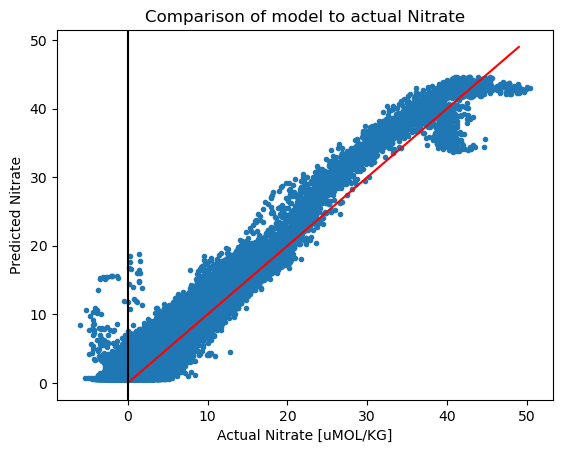

In [92]:
#Plot real versus predicted with a cutoff line for values below zero
#include one-to-one line
onetoone = range(50)
plt.plot(data_2['NITRATE[uMOL/KG]'],argopred,'.')
plt.plot(onetoone,onetoone,color='red')
plt.axvline(x=0,color='black')
plt.ylabel("Predicted Nitrate")
plt.xlabel("Actual Nitrate [uMOL/KG]")
plt.title("Comparison of model to actual Nitrate")
plt.show()

Overall, we see a linear match, but with predicted values often being higher than the actual value by an offset of ~ 5 uMol/kg

Most of the outlier data is where Nitrate concentrations were less than zero - that is, not recorded. Because this model looked at the dataset without Nitrate present, anomalous sites with negative nitrate concentrations could not be excluded.

### Factors impacting Model Accuracy

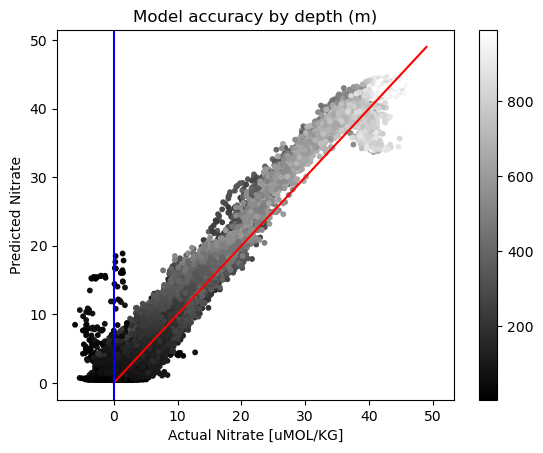

In [99]:
# Re-plot but with shading for variation in depth
plt.scatter(data_2['NITRATE[uMOL/KG]'],argopred, c=data_2['DEPTH[M]'], s=10)
plt.plot(onetoone,onetoone,color='red')
plt.axvline(x=0,color='blue')
plt.ylabel("Predicted Nitrate")
plt.xlabel("Actual Nitrate [uMOL/KG]")
plt.title("Model accuracy by depth (m)")
plt.colorbar()
plt.gray()

Nitrate increases with depth, as expected.

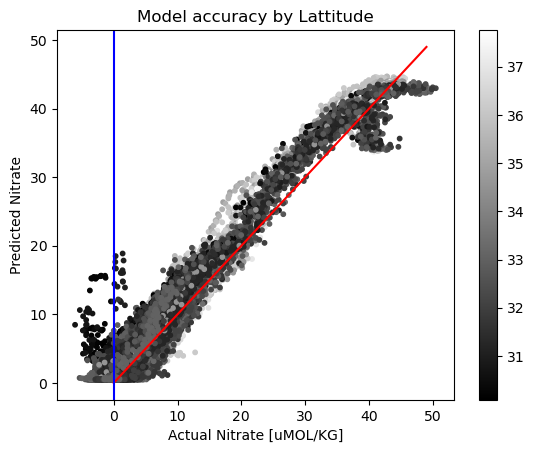

In [94]:
# Re-plot but with shading for variation in latitude
plt.scatter(data_2['NITRATE[uMOL/KG]'],argopred, c=data_2['LAT'], s=10)
plt.plot(onetoone,onetoone,color='red')
plt.axvline(x=0,color='blue')
plt.ylabel("Predicted Nitrate")
plt.xlabel("Actual Nitrate [uMOL/KG]")
plt.title("Model accuracy by Lattitude")
plt.colorbar()
plt.gray()

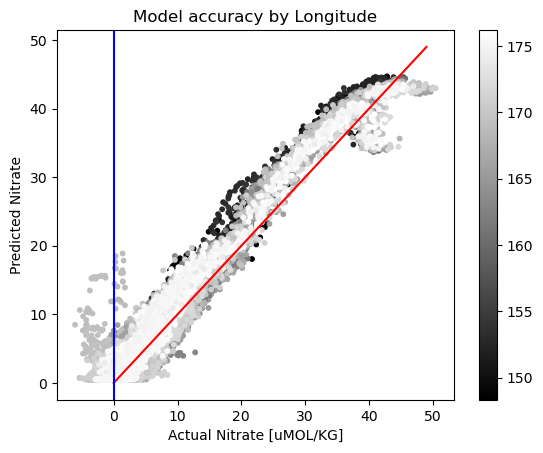

In [95]:
# Re-plot but with shading for variation in longitude
plt.scatter(data_2['NITRATE[uMOL/KG]'],argopred, c=data_2['LON'], s=10)
plt.plot(onetoone,onetoone,color='red')
plt.axvline(x=0,color='blue')
plt.ylabel("Predicted Nitrate")
plt.xlabel("Actual Nitrate [uMOL/KG]")
plt.title("Model accuracy by Longitude")
plt.colorbar()
plt.gray()

Some of the more outier data is those found at ~150 longitude and ~37 lattitude. This is at the most western end of the Argo data. The JMA data included more points from further to the west, and overall further south, which could explain the variance being related to geographic location.

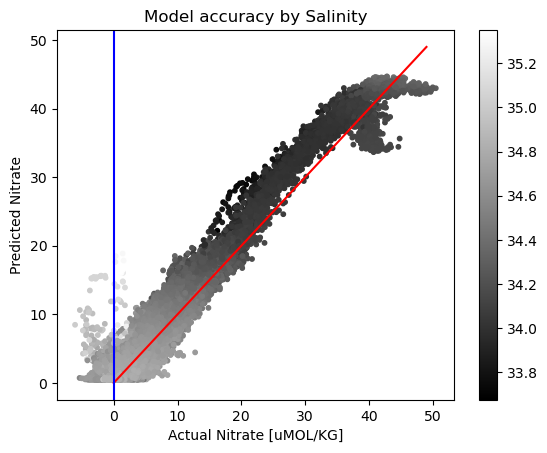

In [102]:
# Re-plot but with shading for variation in salinity
plt.scatter(data_2['NITRATE[uMOL/KG]'],argopred, c=data_2['SALINITY[PSS]'], s=10)
plt.plot(onetoone,onetoone,color='red')
plt.axvline(x=0,color='blue')
plt.ylabel("Predicted Nitrate")
plt.xlabel("Actual Nitrate [uMOL/KG]")
plt.title("Model accuracy by Salinity")
plt.colorbar()
plt.gray()

While overall nitrate concentration increases as Salinity decreases, the highest values show a slight increase in salinity, but the higher values in the 10-20 range are lower than the surrounding, and the hiest values in the 40-50 range are slightly higher than the surrounding. 

This may be a sign of the salinity impacting model variability, or connected to the geographic differences as a signifier of water masses.

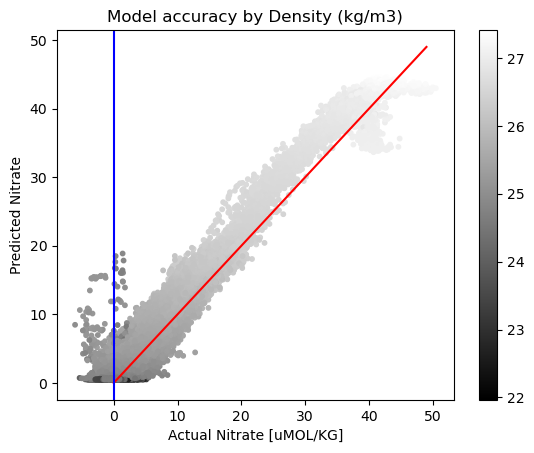

In [105]:
# Re-plot but with shading for variation in density
plt.scatter(data_2['NITRATE[uMOL/KG]'],argopred, c=data_2['SIGMATHETA[KG/M3]'], s=10)
plt.plot(onetoone,onetoone,color='red')
plt.axvline(x=0,color='blue')
plt.ylabel("Predicted Nitrate")
plt.xlabel("Actual Nitrate [uMOL/KG]")
plt.title("Model accuracy by Density (kg/m3)")
plt.colorbar()
plt.gray()

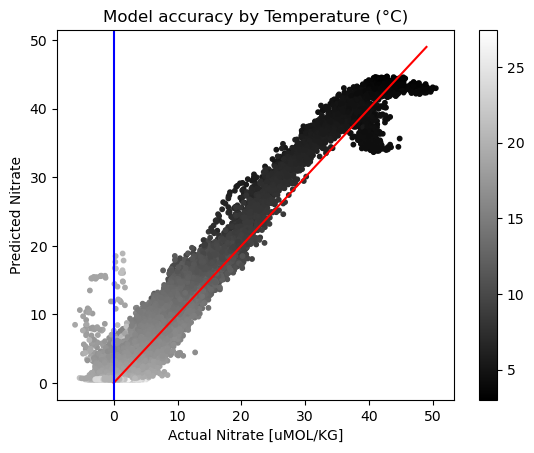

In [108]:
# Re-plot but with shading for variation in temperature
plt.scatter(data_2['NITRATE[uMOL/KG]'],argopred, c=data_2['TEMPERATURE[C]'], s=10)
plt.plot(onetoone,onetoone,color='red')
plt.axvline(x=0,color='blue')
plt.ylabel("Predicted Nitrate")
plt.xlabel("Actual Nitrate [uMOL/KG]")
plt.title("Model accuracy by Temperature (°C)")
plt.colorbar()
plt.gray()

Nitrate increases with density and decreaases with temperature. Nothing to note about outliers.

# Conclusion
The model is overall very accurate but not precise. The difference in geographic ranges of the two datasets seems to produce most of the errors present. 